<a href="https://colab.research.google.com/github/MarinaSokolova111/OPDA/blob/main/%D0%9E%D0%9F%D0%94%D0%90_%D0%9B%D0%B0%D0%B1_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset7.xls to dataset7 (1).xls


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0+ KB


In [ ]:
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
data = read_csv('dataset7.xls', header=0, index_col=0)
print(data.head())

values = data.values
values = values.reshape((len(values), 1))

scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])

inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
Min: 0.000000, Max: 26.300000
[0.78707224]
[0.68060837]
[0.7148289]
[0.55513308]
[0.60076046]
[20.7]
[17.9]
[18.8]
[14.6]
[15.8]


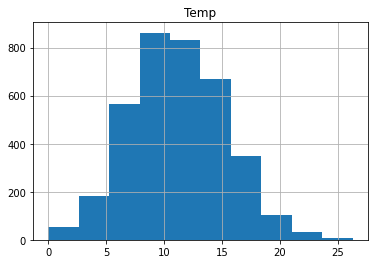

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
df = read_csv('dataset7.xls', header=0, index_col=0)
df.hist()
pyplot.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

values = df.values
values = values.reshape((len(values), 1))

scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])

inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

Mean: 18.370300, StandardDeviation: 6.088161
[0.41551133]
[0.36623537]
[0.33338473]
[0.21840749]
[-0.53715725]
[20.9]
[20.6]
[20.4]
[19.7]
[15.1]




---

---


# Задание


# Импорт и обработка данных

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

url='http://pogoda-service.ru/archive_gsod_res.php?country=GR&station=167263&datepicker_beg=01.12.2010&datepicker_end=01.12.2020&bsubmit=%D0%9F%D0%BE%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C'
req=requests.get(url)
data=pd.read_html(req.text, )
df=data[0]
df.head()

,ÐÐ°ÑÐ°,ÐÐ°ÐºÑÐ¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÐ¸Ð½Ð¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,Ð¡ÑÐµÐ´Ð½ÑÑ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÑÐ¼Ð¾ÑÑÐµÑÐ½Ð¾Ðµ Ð´Ð°Ð²Ð»ÐµÐ½Ð¸Ðµ,Ð¡ÐºÐ¾ÑÐ¾ÑÑÑ Ð²ÐµÑÑÐ°,ÐÑÐ°Ð´ÐºÐ¸,Ð­ÑÑÐµÐºÑÐ¸Ð²Ð½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°
0,01.12.2010,23.0,19.0,20.9,NaN,5,0.0,18.8
1,02.12.2010,22.0,19.0,20.6,NaN,4,0.0,19.7
2,03.12.2010,22.0,18.0,20.4,NaN,5,0.0,19.0
3,04.12.2010,21.0,18.0,19.7,NaN,7,0.0,16.6
4,05.12.2010,16.0,14.0,15.1,NaN,7,0.0,10.2


In [2]:
df.head()

,ÐÐ°ÑÐ°,ÐÐ°ÐºÑÐ¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÐ¸Ð½Ð¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,Ð¡ÑÐµÐ´Ð½ÑÑ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÑÐ¼Ð¾ÑÑÐµÑÐ½Ð¾Ðµ Ð´Ð°Ð²Ð»ÐµÐ½Ð¸Ðµ,Ð¡ÐºÐ¾ÑÐ¾ÑÑÑ Ð²ÐµÑÑÐ°,ÐÑÐ°Ð´ÐºÐ¸,Ð­ÑÑÐµÐºÑÐ¸Ð²Ð½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°
0,01.12.2010,23.0,19.0,20.9,NaN,5,0.0,18.8
1,02.12.2010,22.0,19.0,20.6,NaN,4,0.0,19.7
2,03.12.2010,22.0,18.0,20.4,NaN,5,0.0,19.0
3,04.12.2010,21.0,18.0,19.7,NaN,7,0.0,16.6
4,05.12.2010,16.0,14.0,15.1,NaN,7,0.0,10.2


In [3]:
df.drop(['ÐÐ°ÑÐ°', 'ÐÐ°ÐºÑÐ¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°', 'ÐÐ¸Ð½Ð¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°', 'ÐÑÐ¼Ð¾ÑÑÐµÑÐ½Ð¾Ðµ Ð´Ð°Ð²Ð»ÐµÐ½Ð¸Ðµ', 'Ð¡ÐºÐ¾ÑÐ¾ÑÑÑ Ð²ÐµÑÑÐ°', 'ÐÑÐ°Ð´ÐºÐ¸', 'Ð­ÑÑÐµÐºÑÐ¸Ð²Ð½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°'], axis=1, inplace=True)
df.columns=['t`C mean']

In [4]:
df.describe()

,t`C mean
count,1000.000000
mean,18.370300
std,6.091208
min,2.100000
25%,13.400000
50%,18.000000
75%,23.900000
max,31.400000


# Стандартизация и нормализация временных рядов

In [5]:
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

values = df.values
values = values.reshape((len(values), 1))

scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])

inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

Min: 2.100000, Max: 31.400000
[0.64163823]
[0.63139932]
[0.62457338]
[0.60068259]
[0.44368601]
[20.9]
[20.6]
[20.4]
[19.7]
[15.1]


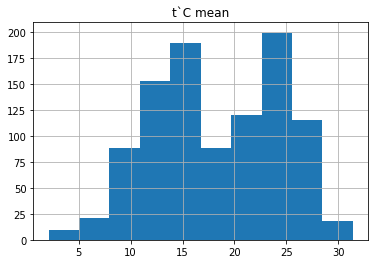

In [6]:
from matplotlib import pyplot
df.hist()
pyplot.show()

In [7]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

values = df.values
values = values.reshape((len(values), 1))

scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])

inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

Mean: 18.370300, StandardDeviation: 6.088161
[0.41551133]
[0.36623537]
[0.33338473]
[0.21840749]
[-0.53715725]
[20.9]
[20.6]
[20.4]
[19.7]
[15.1]


# Результат

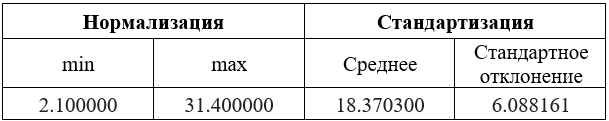